In [1]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
# Load the dataset
data = pd.read_csv('C:\\Users\\ESHOP\\Documents\\Kaggle Practice Project\\Datasets\\yield.csv\\yield.csv')

# Display initial data information
print(data.head())
print(data.info())


  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 n

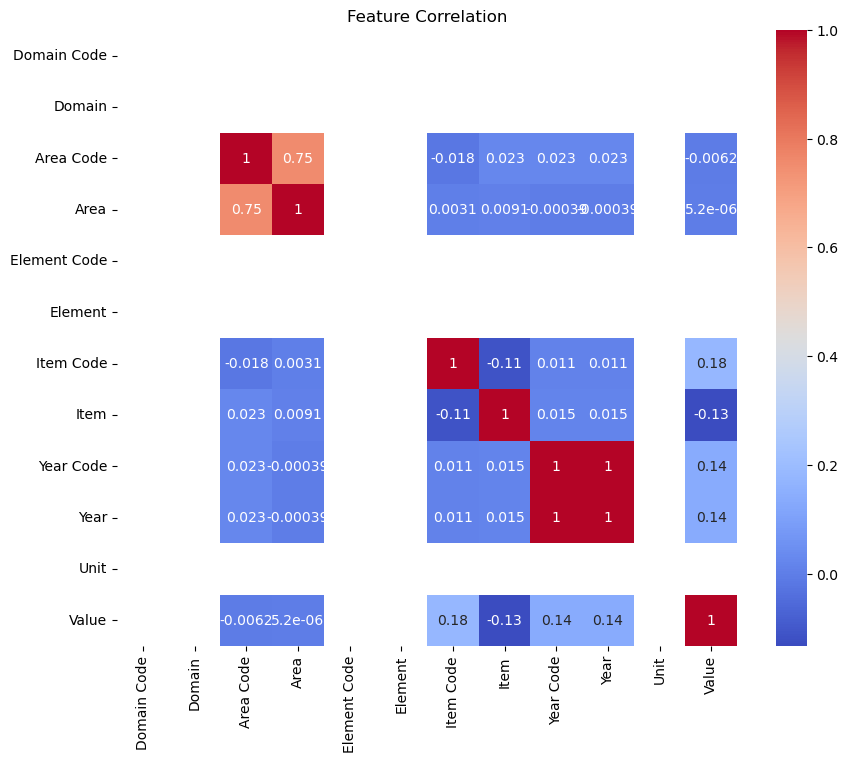

In [4]:
# Load your data (replace with your dataset path)
data = pd.read_csv("C:\\Users\\ESHOP\\Documents\\Kaggle Practice Project\\Datasets\\yield.csv\\yield.csv")

# Identify and encode categorical columns
for column in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

# Compute and plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()



In [6]:
# Encode categorical features if necessary
# Assuming 'Crop_Type' is a categorical variable in the dataset
if 'Crop_Type' in data.columns:
    label_encoder = LabelEncoder()
    data['Crop_Type'] = label_encoder.fit_transform(data['Crop_Type'])

# Handle other potential categorical columns similarly...

# Extract target variable (e.g., 'Yield') and features
X = data.drop('Value', axis=1)  # Replace 'Yield' with the actual target column name
y = data['Value']

# Scale numerical features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R-squared: {r2}')


Train RMSE: 5018.775185509768
Test RMSE: 12550.717553699653
R-squared: 0.965886688460395
